<a href="https://colab.research.google.com/github/zameerhossain/Image-forgery-detection-using-deep-learning/blob/master/Pretrained%20with%20transfer%20learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget clone https://www.dropbox.com/s/iuv35g1bdgbj9g7/phase-01-training.tar.gz
#!wget clone https://www.dropbox.com/s/711qsc6u79f6dwr/phase-01-testing.tar.gz


!apt-get install p7zip-full
!p7zip -d phase-01-training.tar.gz
!tar -xvf phase-01-training.tar.gz


#!apt-get install p7zip-full
#!p7zip -d phase-01-testing.tar.gz
#!tar -xvf phase-01-testing.tar.gz

--2020-01-16 22:39:20--  http://clone/
Resolving clone (clone)... failed: Name or service not known.
wget: unable to resolve host address ‘clone’
--2020-01-16 22:39:26--  https://www.dropbox.com/s/iuv35g1bdgbj9g7/phase-01-training.tar.gz
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.1, 2620:100:6031:1::a27d:5101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/iuv35g1bdgbj9g7/phase-01-training.tar.gz [following]
--2020-01-16 22:39:26--  https://www.dropbox.com/s/raw/iuv35g1bdgbj9g7/phase-01-training.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc77a02e6b2197ce599ed119c006.dl.dropboxusercontent.com/cd/0/inline/AwTtFLKwmEt5NWFpf6boLFX07oZFRXJUIxOTb88jfKwnvKAfN7PAyQ_k4Cq60x9TEB_JrAD1sYAW2YJbnCmJK8mXHbloDt79OAkSPtbYHtn1vA/file# [following]
--2020-01-16 22:39:26--  https://uc77a02e6b2197ce5

In [2]:
        
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = 'dataset-dist/phase-01'
train_dir = os.path.join(base_dir, 'training')

Using TensorFlow backend.


In [3]:
from keras.applications import VGG16
#Load the VGG model
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers except the last 4 layers
for layer in conv_base.layers[:-4]:
    layer.trainable = False
 
# Check the trainable status of the individual layers
for layer in conv_base.layers:
    print(layer, layer.trainable)
conv_base.summary()






58892288/58889256 [==============================] - 6s 0us/step






<keras.engine.input_layer.InputLayer object at 0x7f2a1185d080> False
<keras.layers.convolutional.Conv2D object at 0x7f2a1185d198> False
<keras.layers.convolutional.Conv2D object at 0x7f2a1185d518> False
<keras.layers.pooling.MaxPooling2D object at 0x7f2a1187e588> False
<keras.layers.convolutional.Conv2D object at 0x7f2a11007b00> False
<keras.layers.convolutional.Conv2D object at 0x7f2a11010d30> False
<keras.layers.pooling.MaxPooling2D object at 0x7f2a11017a90> False
<keras.layers.convolutional.Conv2D object at 0x7f2a110229b0> False
<keras.layers.convolutional.Conv2D object at 0x7f2a11025278> False
<keras.layers.convolutional.Conv2D object at 0x7f2a1102d5f8> False
<keras.layers.pooling.MaxPooling2D object at 0x7f2a11033860> False
<keras.layers.convolutional.Conv2D object at 0x7f2a10fbe898> False
<keras.layers.convolutional.Conv2D object at 0x7f2a10fbeeb8> False
<keras.layers.convolutional.Conv2D object at 0x7f2a1

In [4]:
import tensorflow as tf
from keras import models
from keras import layers
from keras import optimizers
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
# Create the model
model = models.Sequential()
 
# Add the vgg convolutional base model
model.add(conv_base)
model.add(layers.Conv2D(512, (1, 1)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5))

# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
 
# Show a summary of the model. Check the number of trainable parameters
model.summary()


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 512)         262656    
_________________________________________________________________
activation_1 (Activation)    (None, 7, 7, 512)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 512)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 3, 512)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
____

In [6]:


 

 

 



from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest',
      validation_split=0.3)


validation_datagen =ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
 
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

validation_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)


# Save the model
model.save('pretrain.cnn')


Found 1950 images belonging to 2 classes.
Found 1950 images belonging to 2 classes.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/30


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


100/100 [==============================] - 124s 1s/step - loss: 0.6798 - acc: 0.6205 - val_loss: 0.5591 - val_acc: 0.7230
Epoch 2/30
100/100 [==============================] - 108s 1s/step - loss: 0.5868 - acc: 0.7000 - val_loss: 0.4953 - val_acc: 0.7636
Epoch 3/30
100/100 [==============================] - 109s 1s/step - loss: 0.5247 - acc: 0.7320 - val_loss: 0.4972 - val_acc: 0.7410
Epoch 4/30
100/100 [==============================] - 112s 1s/step - loss: 0.4894 - acc: 0.7525 - val_loss: 0.4427 - val_acc: 0.7818
Epoch 5/30
100/100 [==============================] - 109s 1s/step - loss: 0.4835 - acc: 0.7520 - val_loss: 0.4310 - val_acc: 0.7940
Epoch 6/30
100/100 [==============================] - 110s 1s/step - loss: 0.4530 - acc: 0.7715 - val_loss: 0.4474 - val_acc: 0.7556
Epoch 7/30
100/100 [==============================] - 108s 1s/step - loss: 0.4518 - acc: 0.7700 - val_loss: 0.4206 - val_acc: 0.7810
Epoch 8/30
100/100 [==============================] - 117s 1s/step - loss: 0.454

In [7]:
# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
# Train the model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)
 
# Save the model
model.save('pretrain.cnn')

Epoch 1/30
75/97 [======================>.......] - ETA: 18s - loss: 0.6689 - acc: 0.7607

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


98/97 [==============================] - 154s 2s/step - loss: 0.6191 - acc: 0.7704 - val_loss: 0.5448 - val_acc: 0.7862
Epoch 2/30
98/97 [==============================] - 144s 1s/step - loss: 0.4718 - acc: 0.7760 - val_loss: 0.4239 - val_acc: 0.8128
Epoch 3/30
98/97 [==============================] - 144s 1s/step - loss: 0.4557 - acc: 0.7832 - val_loss: 0.4068 - val_acc: 0.7995
Epoch 4/30
98/97 [==============================] - 146s 1s/step - loss: 0.4647 - acc: 0.7842 - val_loss: 0.3991 - val_acc: 0.7985
Epoch 5/30
98/97 [==============================] - 146s 1s/step - loss: 0.4391 - acc: 0.7775 - val_loss: 0.5255 - val_acc: 0.7759
Epoch 6/30
98/97 [==============================] - 144s 1s/step - loss: 0.4642 - acc: 0.7939 - val_loss: 0.3846 - val_acc: 0.8056
Epoch 7/30
98/97 [==============================] - 144s 1s/step - loss: 0.4508 - acc: 0.8000 - val_loss: 0.3987 - val_acc: 0.8077
Epoch 8/30
97/97 [============================>.] - ETA: 0s - loss: 0.4471 - acc: 0.8036

KeyboardInterrupt: ignored

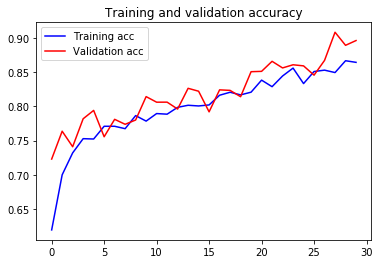

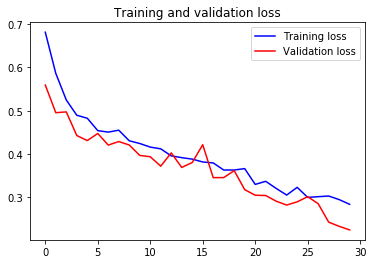

In [10]:

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

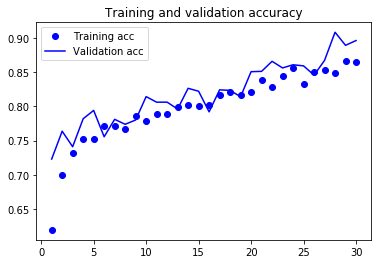

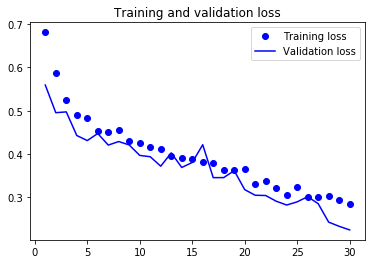

In [9]:









import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:


 

 

 


validation_generator = train_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary',
    subset='validation',
    shuffle=False)


from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest',
      validation_split=0.3)


validation_datagen =ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
 
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

validation_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=0.0001),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)


# Save the model
model.save('pretrain1.cnn')
